In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2360\3096325152.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# Convert data types
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [10]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

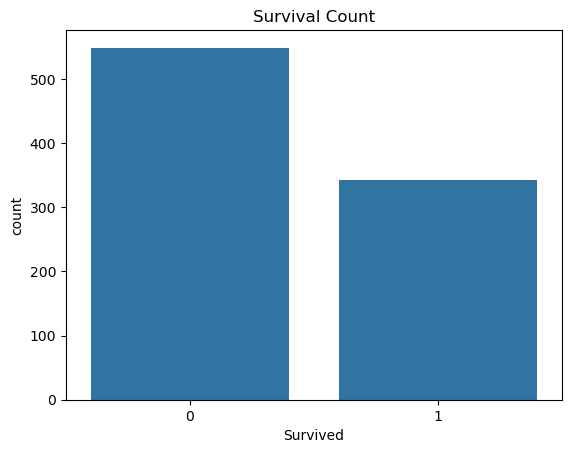

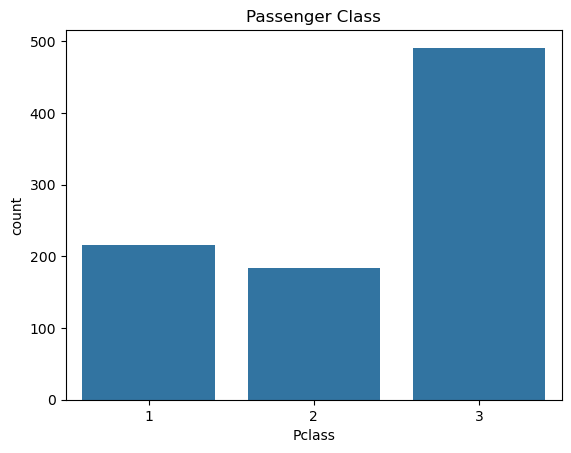

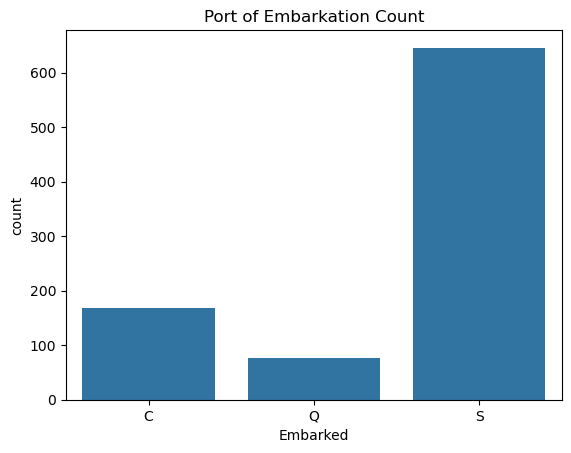

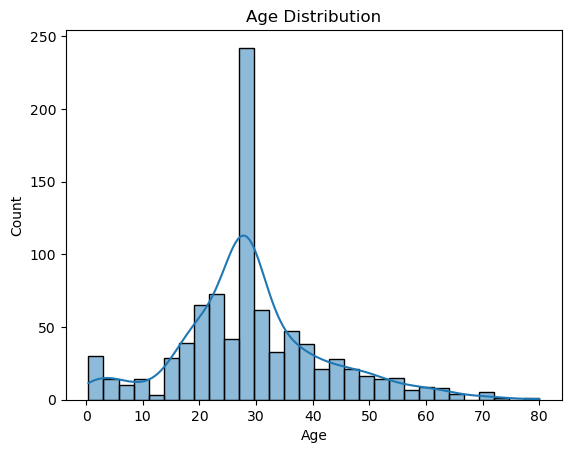

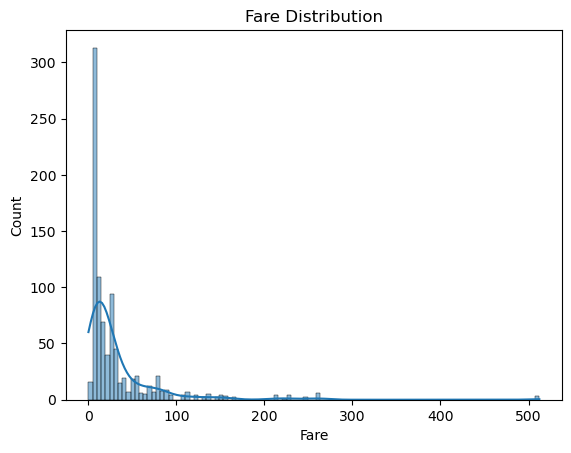

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plots
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class")
plt.show()

sns.countplot(data=df, x='Embarked')
plt.title("Port of Embarkation Count")
plt.show()

# Distribution plots
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df['Fare'], kde=True)
plt.title("Fare Distribution")
plt.show()


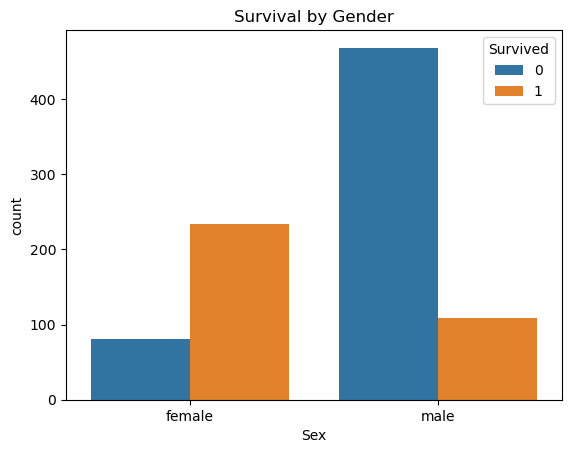

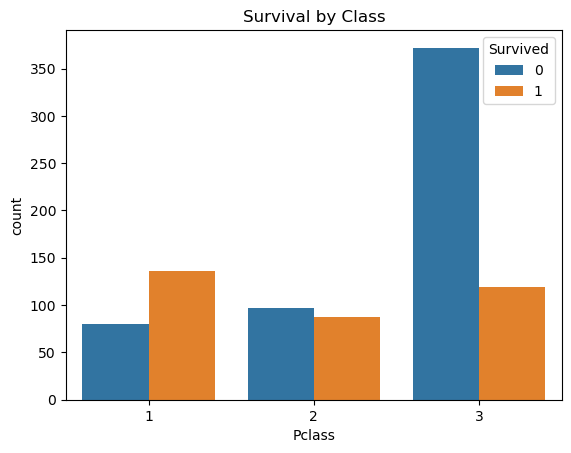

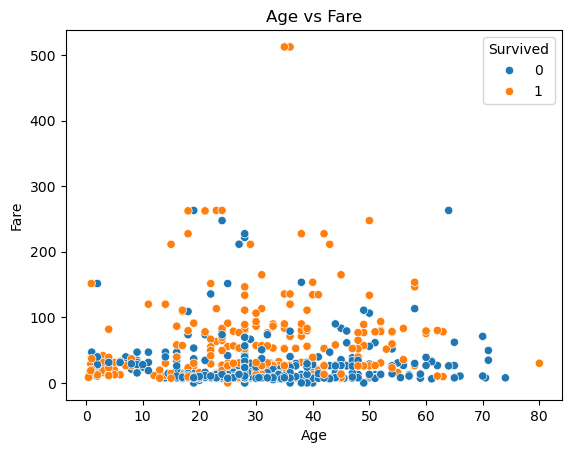

C:\vaishnavisoftwares\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\vaishnavisoftwares\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\vaishnavisoftwares\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\vaishnavisoftwares\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


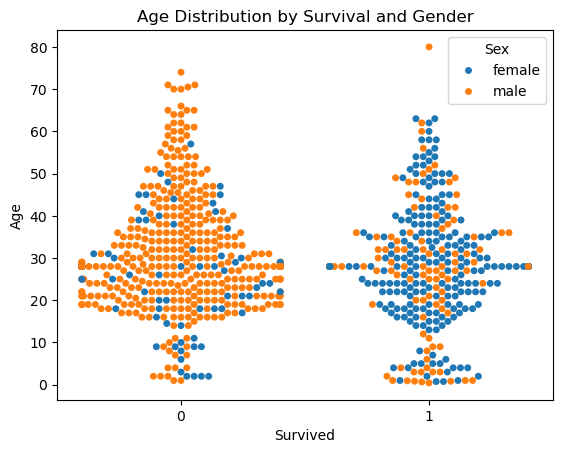

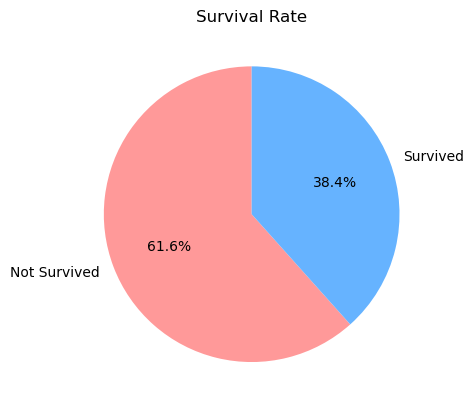

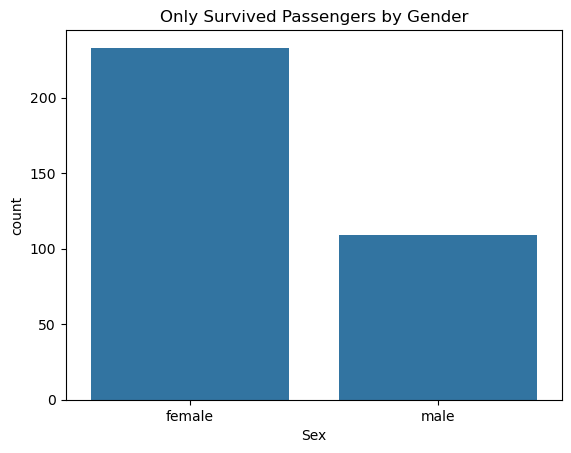

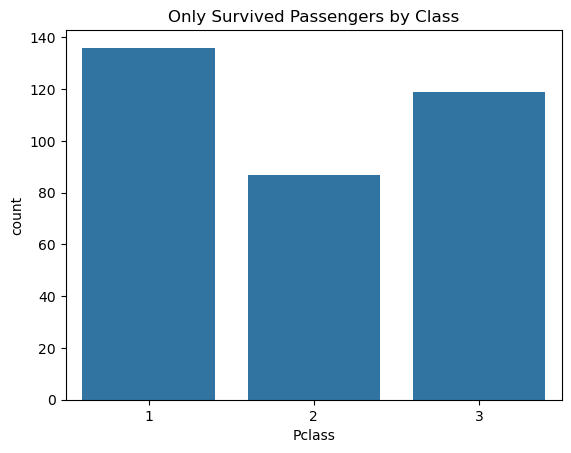

In [53]:
# Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

# Survival by Class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()

# Age vs Fare
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title("Age vs Fare")
plt.show()

sns.swarmplot(data=df, x='Survived', y='Age', hue='Sex')
plt.title("Age Distribution by Survival and Gender")
plt.show()

df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Not Survived', 'Survived'], colors=['#ff9999','#66b3ff'])
plt.title("Survival Rate")
plt.ylabel('')
plt.show()

sns.countplot(data=df[df['Survived'] == 1], x='Sex')
plt.title("Only Survived Passengers by Gender")
plt.show()

sns.countplot(data=df[df['Survived'] == 1], x='Pclass')
plt.title("Only Survived Passengers by Class")
plt.show()


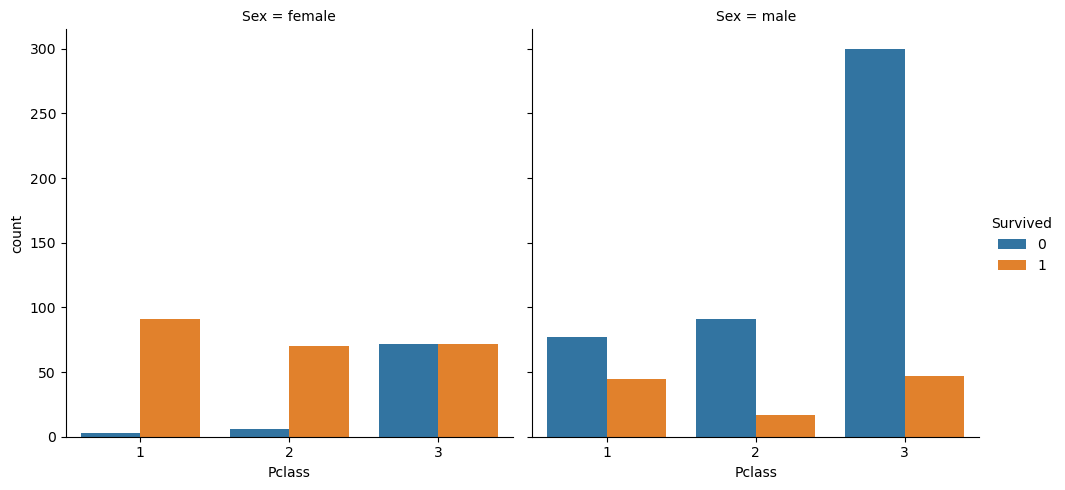

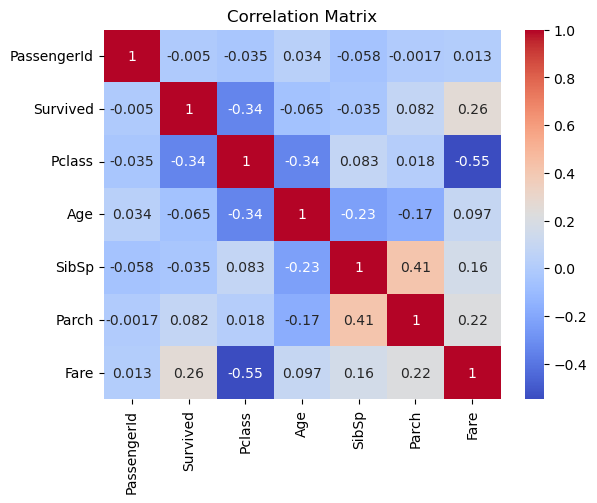

In [28]:
# Survival by Gender and Class
sns.catplot(data=df, x='Pclass', hue='Survived', col='Sex', kind='count')
plt.show()

# Correlation heatmap
numeric_features = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_features.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [56]:
# Extract title from name
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Compute family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Group fare into categories
df['FareGroup'] = pd.qcut(df['Fare'], 3, labels=['Low', 'Medium', 'High'])

print(df['Title'].value_counts())
print(df['FareGroup'].value_counts())
# Print relevant columns to check
df[['Name', 'Title', 'SibSp', 'Parch', 'FamilySize', 'Fare', 'FareGroup']].head(10)


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
FareGroup
Low       308
High      295
Medium    288
Name: count, dtype: int64


,Name,Title,SibSp,Parch,FamilySize,Fare,FareGroup
0,"Braund, Mr. Owen Harris",Mr,1,0,2,7.2500,Low
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,1,0,2,71.2833,High
2,"Heikkinen, Miss. Laina",Miss,0,0,1,7.9250,Low
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,1,0,2,53.1000,High
4,"Allen, Mr. William Henry",Mr,0,0,1,8.0500,Low
5,"Moran, Mr. James",Mr,0,0,1,8.4583,Low
6,"McCarthy, Mr. Timothy J",Mr,0,0,1,51.8625,High
7,"Palsson, Master. Gosta Leonard",Master,3,1,5,21.0750,Medium
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs,0,2,3,11.1333,Medium
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs,1,0,2,30.0708,High


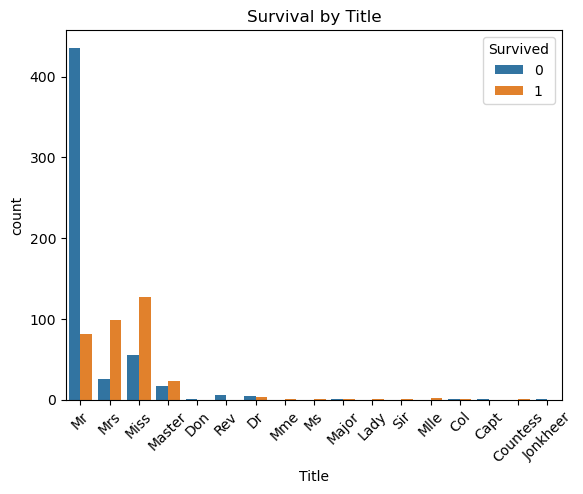

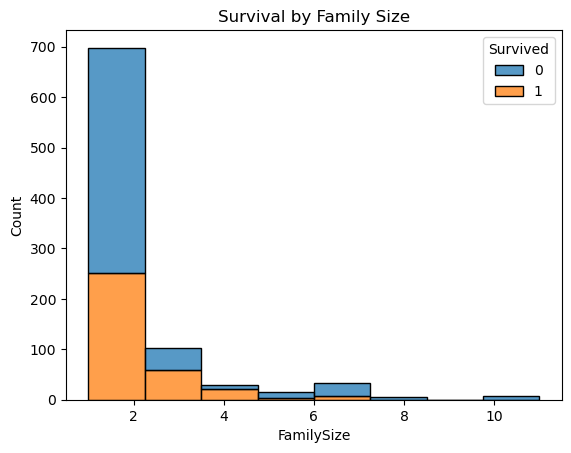

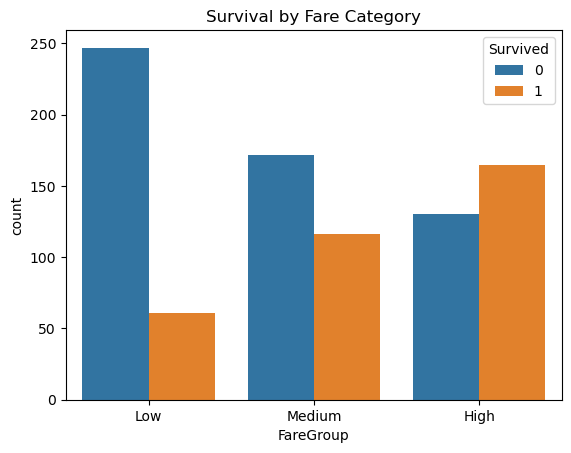

In [41]:
# Plot engineered features

# 1. Survival by Title
sns.countplot(data=df, x='Title', hue='Survived')
plt.xticks(rotation=45)
plt.title("Survival by Title")
plt.show()


# 2. Survival by Family Size (you may want to convert this to categories)
sns.histplot(data=df, x='FamilySize', hue='Survived', multiple='stack', bins=8)
plt.title("Survival by Family Size")
plt.show()


# 3. Survival by Fare Group
sns.countplot(data=df, x='FareGroup', hue='Survived')
plt.title("Survival by Fare Category")
plt.show()
